# Exercise - Basic Training Workflow

## Objective
Predict PM2.5 concentration based on the other features.

# Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

# Tasks

1. Import data through read_csv
2. Explore / transform / clean data
3. Shuffle data and split into training and test sets
4. Scale the training and test sets
5. Train linear regression and evaluate metrics
6. Train linear regression with Stochastic Gradient Descent and evaluate metrics
7. Get a prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1. Import data through read_csv 

(Estimated time: 30 min)

Check:
- Did the data import correctly?
- What are the types of each column? Are there non-numeric types?
- How large is the dataset?

In [2]:
df = pd.read_csv("C:\\courses\\data\\beijing-pmi\\PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
df.head()
#df.shape
#df.describe()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

## 2. Explore / transform / clean data 

(Estimated time: 60 min)

You should:
- do something with the NaN values
- ignore the non-numeric column for now. We will cover label encoding later (if you are really curious or want to try it, open clustering.ipynb and search for 'LabelEncoder').
- plot the data to see if there is a correlation. You can choose to:
   - plot the data in 2d or 3d after applying PCA to reduce dimensions, or
   - plot multiple plots per column

In [12]:
df.dropna(inplace=True)

In [45]:
df.describe()
df.columns
df['pm2.5']

2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
2010-01-02 05:00:00    109.0
2010-01-02 06:00:00    105.0
2010-01-02 07:00:00    124.0
2010-01-02 08:00:00    120.0
2010-01-02 09:00:00    132.0
2010-01-02 10:00:00    140.0
2010-01-02 11:00:00    152.0
2010-01-02 12:00:00    148.0
2010-01-02 13:00:00    164.0
2010-01-02 14:00:00    158.0
2010-01-02 15:00:00    154.0
2010-01-02 16:00:00    159.0
2010-01-02 17:00:00    164.0
2010-01-02 18:00:00    170.0
2010-01-02 19:00:00    149.0
2010-01-02 20:00:00    154.0
2010-01-02 21:00:00    164.0
2010-01-02 22:00:00    156.0
2010-01-02 23:00:00    126.0
2010-01-03 00:00:00     90.0
2010-01-03 01:00:00     63.0
2010-01-03 02:00:00     65.0
2010-01-03 03:00:00     55.0
2010-01-03 04:00:00     65.0
2010-01-03 05:00:00     83.0
                       ...  
2014-12-30 18:00:00     79.0
2014-12-30 19:00:00     35.0
2014-12-30 20:00:00     26.0
2014-12-30 21:

In [36]:
pca = PCA(n_components=2)
#df.drop(columns='No',inplace=True)
X = df.loc[:,['year','month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir']]

X_2d = pca.fit_transform(X)

print(X.shape)
print(df.describe())

X_2d.shape
print(X.columns)

(41757, 10)
               year         month           day          hour         pm2.5  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean    2012.042771      6.513758     15.685514     11.502311     98.613215   
std        1.415311      3.454199      8.785539      6.924848     92.050387   
min     2010.000000      1.000000      1.000000      0.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.000000     29.000000   
50%     2012.000000      7.000000     16.000000     12.000000     72.000000   
75%     2013.000000     10.000000     23.000000     18.000000    137.000000   
max     2014.000000     12.000000     31.000000     23.000000    994.000000   

               DEWP          TEMP          PRES           Iws            Is  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       1.750174     12.401561   1016.442896     23.866747      0.055344   
std       14.433658     12.175215     1

<IPython.core.display.Javascript object>


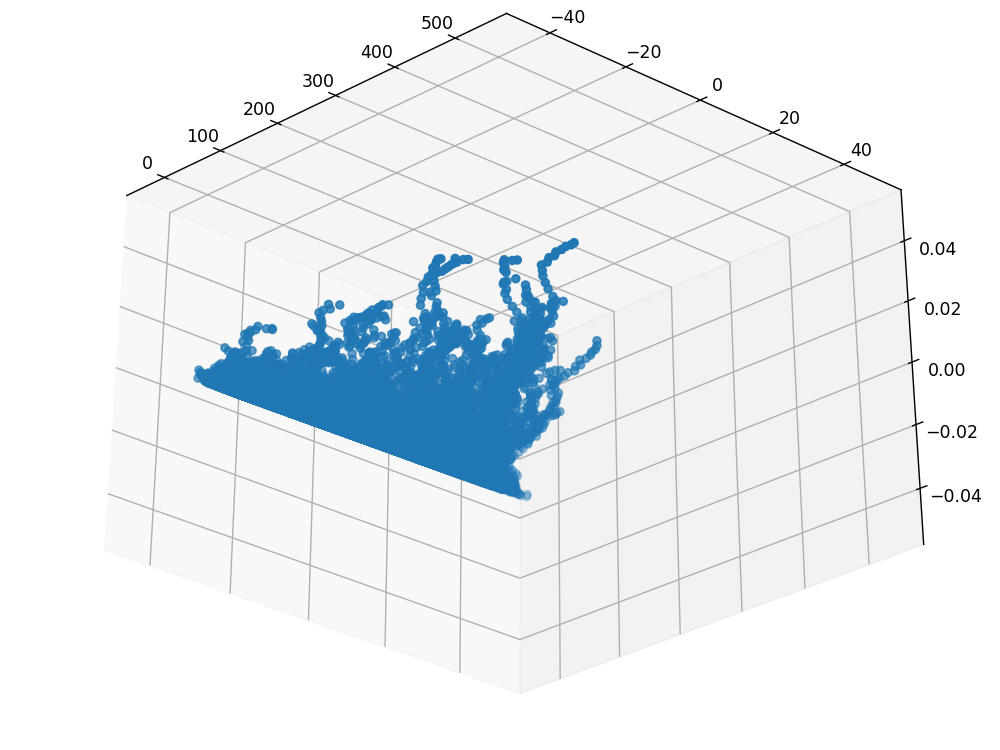

In [39]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig)

ax.scatter(X_2d[:,0],X_2d[:,1])

In [24]:
print(df.dtypes)
df.index = pd.to_datetime({'year':df.year,'month':df.month, 'day': df.day, 'hour' : df.hour})
df

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
Iws      float64
Is         int64
Ir         int64
dtype: object


No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES  \
2010-01-02 00:00:00     25  2010      1    2     0  129.0   -16  -4.0  1020.0   
2010-01-02 01:00:00     26  2010      1    2     1  148.0   -15  -4.0  1020.0   
2010-01-02 02:00:00     27  2010      1    2     2  159.0   -11  -5.0  1021.0   
2010-01-02 03:00:00     28  2010      1    2     3  181.0    -7  -5.0  1022.0   
2010-01-02 04:00:00     29  2010      1    2     4  138.0    -7  -5.0  1022.0   
2010-01-02 05:00:00     30  2010      1    2     5  109.0    -7  -6.0  1022.0   
2010-01-02 06:00:00     31  2010      1    2     6  105.0    -7  -6.0  1023.0   
2010-01-02 07:00:00     32  2010      1    2     7  124.0    -7  -5.0  1024.0   
2010-01-02 08:00:00     33  2010      1    2     8  120.0    -8  -6.0  1024.0   
2010-01-02 09:00:00     34  2010      1    2     9  132.0    -7  -5.0  1025.0   
2010-01-02 10:00:00     35  2010      1    2    10  140.0    -7  -5.0  1026.0   
2010-01-02 11:00:00     36  2010      1    2    11  152.0    -8  -5.0  1026.0   
2010-01-02 12:00:00     37  2010      1    2    12  148.0    -8  -5.0  1026.0   
2010-01-02 13:00:00     38  2010      1    2    13  164.0    -8  -5.0  1025.0   
2010-01-02 14:00:00     39  2010      1    2    14  158.0    -9  -5.0  1025.0   
2010-01-02 15:00:00     40  2010      1    2    15  154.0    -9  -5.0  1025.0   
2010-01-02 16:00:00     41  2010      1    2    16  159.0    -9  -5.0  1026.0   
2010-01-02 17:00:00     42  2010      1    2    17  164.0    -8  -5.0  1027.0   
2010-01-02 18:00:00     43  2010      1    2    18  170.0    -8  -5.0  1027.0   
2010-01-02 19:00:00     44  2010      1    2    19  149.0    -8  -5.0  1028.0   
2010-01-02 20:00:00     45  2010      1    2    20  154.0    -7  -5.0  1028.0   
2010-01-02 21:00:00     46  2010      1    2    21  164.0    -7  -5.0  1027.0   
2010-01-02 22:00:00     47  2010      1    2    22  156.0    -8  -6.0  1028.0   
2010-01-02 23:00:00     48  2010      1    2    23  126.0    -8  -6.0  1027.0   
2010-01-03 00:00:00     49  2010      1    3     0   90.0    -7  -6.0  1027.0   
2010-01-03 01:00:00     50  2010      1    3     1   63.0    -8  -6.0  1026.0   
2010-01-03 02:00:00     51  2010      1    3     2   65.0    -8  -7.0  1026.0   
2010-01-03 03:00:00     52  2010      1    3     3   55.0    -8  -7.0  1025.0   
2010-01-03 04:00:00     53  2010      1    3     4   65.0    -8  -7.0  1024.0   
2010-01-03 05:00:00     54  2010      1    3     5   83.0    -9  -8.0  1024.0   
...                    ...   ...    ...  ...   ...    ...   ...   ...     ...   
2014-12-30 18:00:00  43795  2014     12   30    18   79.0   -13   2.0  1020.0   
2014-12-30 19:00:00  43796  2014     12   30    19   35.0    -8   6.0  1021.0   
2014-12-30 20:00:00  43797  2014     12   30    20   26.0   -11   5.0  1022.0   
2014-12-30 21:00:00  43798  2014     12   30    21   20.0   -12   4.0  1023.0   
2014-12-30 22:00:00  43799  2014     12   30    22    8.0   -21   2.0  1025.0   
2014-12-30 23:00:00  43800  2014     12   30    23   16.0   -22   0.0  1026.0   
2014-12-31 00:00:00  43801  2014     12   31     0   10.0   -19  -1.0  1027.0   
2014-12-31 01:00:00  43802  2014     12   31     1   11.0   -18  -1.0  1028.0   
2014-12-31 02:00:00  43803  2014     12   31     2   20.0   -17  -1.0  1028.0   
2014-12-31 03:00:00  43804  2014     12   31     3    9.0   -17  -1.0  1029.0   
2014-12-31 04:00:00  43805  2014     12   31     4    8.0   -19  -2.0  1030.0   
2014-12-31 05:00:00  43806  2014     12   31     5    9.0   -21  -3.0  1030.0   
2014-12-31 06:00:00  43807  2014     12   31     6    8.0   -23  -4.0  1032.0   
2014-12-31 07:00:00  43808  2014     12   31     7    8.0   -22  -5.0  1034.0   
2014-12-31 08:00:00  43809  2014     12   31     8    8.0   -22  -5.0  1034.0   
2014-12-31 09:00:00  43810  2014     12   31     9    8.0   -22  -3.0  1034.0   
2014-12-31 10:00:00  43811  2014     12   31    10    7.0   -22  -2.0  1034.0   
2014-12-31 11:00:00  43812  2014     12   31    11   12

In [55]:
# Project in 1 dimensions
pca = PCA(n_components=1)

# Select columns, starting from cylinders and ending at origin
#X = df.loc[:,['year','month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws',
       #'Is', 'Ir']]

X = df.loc[:,['DEWP', 'TEMP', 'PRES', 'Iws', 'Is','Ir']]

#X = df.loc[:,['DEWP', 'TEMP']]
X_1d = pca.fit_transform(X)

# Compare the before and after shapes
print(X.shape)
X_1d.shape

(41757, 6)


(41757, 1)

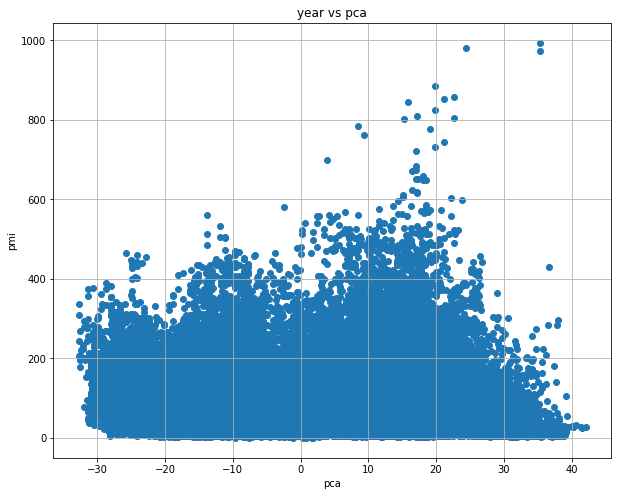

In [54]:
# switch back to non-interactive (this is just a matter of taste)
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

# scatter plot of X_1d and mpg.
#ax.scatter(df.index,X_1d)
ax.scatter(X_1d,df['pm2.5'])
ax.set(xlabel='pca', ylabel='pmi')
ax.set(title = 'year vs pca')
ax.grid()

plt.show()



## 3. Shuffle data and split into training and test sets 

(Estimated time: 20 min)

In [56]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.loc[:, ['DEWP', 'TEMP', 'PRES', 'Iws','Is', 'Ir']]
y = df['pm2.5']

# A typical naming convention is to use upper case (e.g. X) for 2-d matrices, lower case (e.g. y) for 1-d vector
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.1, # reserve about 10% of the data for test
                                                    random_state=42) # set random state so we
                                                                     # get the same dataset each time
                                                                     # we run this code.
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(37581, 6) (37581,) (4176, 6) (4176,)


In [80]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir'],
      dtype='object')

## 4. Scale the training and test sets 

(Estimated time: 20 min)

In [81]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# 1. initialize the scaler
X_scaler.fit(train_X)

# 2. scale both X datasets
train_X_scaled = X_scaler.transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

# Repeat for y
# 1. initialize the scaler
print(train_y.values.shape)
y_scaler.fit(train_y.values.reshape(-1, 1))
print(train_y.values.reshape(-1,1).shape)

# 2. scale both y series
train_y_scaled = y_scaler.transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y.values.reshape(-1, 1))

print(train_X_scaled)

(37581,)
(37581, 1)
[[ 1.4030076   0.86920042 -0.23645432 -0.46308274 -0.07111942 -0.13699615]
 [ 1.47233713  1.03351836 -1.6937164  -0.39119058 -0.07111942 -0.13699615]
 [-1.23151473 -1.84204562  0.63790293 -0.34620777 -0.07111942 -0.13699615]
 ...
 [ 1.4030076   1.60863115 -1.01366076 -0.44500929 -0.07111942 -0.13699615]
 [-1.02352612 -0.69182003  0.63790293 -0.44500929 -0.07111942 -0.13699615]
 [-1.3701738  -1.51340974  1.80371259 -0.1218962  -0.07111942 -0.13699615]]


In [85]:
# This is just to print stuff
coefficients = np.append(lin.intercept_,lin.coef_)
print(df.columns)
# Probably can do a loop, but this code is easier to read
print('mpg_pred_scaled = (%.2f * DEWP) + (%.2f * TEMP) + (%.2f * PRES)\n' \
      '                + (%.2f * Iws) + (%.2f * Is) + (%.2f * Ir)\n' \
      '                ' % tuple(coefficients.flatten()))

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws',
       'Is', 'Ir'],
      dtype='object')


TypeError: not all arguments converted during string formatting

In [ ]:
fig, _ax 

## 5. Train linear regression and evaluate metrics 

- Use LinearRegression to fit a linear model on the training data.
- Evaluate the metrics for this model using r2_score and mean_square_error

(Estimated time: 20 min)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

pred_scaled = lin.predict(test_X_scaled)

print('MSE', mean_squared_error(test_y_scaled, pred_scaled))
print('R2', r2_score(test_y_scaled, pred_scaled))

MSE 0.802361584545739
R2 0.23310878905869725


In [84]:
print('coefficients (w1.....w7)',lin.coef_, 'intercept (w0)', lin.intercept_)

coefficients (w1.....w7) [[ 0.67480875 -0.80146224 -0.16737521 -0.14085499 -0.01909071 -0.11051966]] intercept (w0) [6.39166988e-16]


## 6. Train linear regression with Stochastic Gradient Descent and evaluate metrics 

Use SGDRegressor to train a linear model using SGD
- Evaluate the metrics for this model using r2_score and mean_square_error
- Play around with the parameters to see how the loss is affected

(Estimated time: 30 min)

In [86]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_sgd = sgd.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_sgd))
print('R2:', r2_score(test_y_scaled, pred_scaled_sgd))

-- Epoch 1
Norm: 1.09, NNZs: 6, Bias: -0.014123, T: 37581, Avg. loss: 0.386845
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 6, Bias: -0.010329, T: 75162, Avg. loss: 0.382585
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 6, Bias: -0.009710, T: 112743, Avg. loss: 0.382541
Total training time: 0.03 seconds.
Convergence after 3 epochs took 0.03 seconds
MSE: 0.8031705917968668
R2: 0.23233554596926287


In [87]:
# Learning rate too high
sgd_bad = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000,
                   learning_rate='constant', # keep constant learning rate (instead of decreasing with iterations)
                   eta0 = 10) # learning rate
sgd_bad.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_bad = sgd_bad.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_bad)) # really high
print('R2:', r2_score(test_y_scaled, pred_scaled_bad)) # really low (and negative)

-- Epoch 1
Norm: 127837364547041.98, NNZs: 6, Bias: -1131355030628.320312, T: 37581, Avg. loss: 5199777147428849518813118464.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 44667483116990.57, NNZs: 6, Bias: -20224572725388.781250, T: 75162, Avg. loss: 4758106296076363599133540352.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 111985610936282.14, NNZs: 6, Bias: -4643786637247.898438, T: 112743, Avg. loss: 5731079087067338658283520000.000000
Total training time: 0.02 seconds.
Convergence after 3 epochs took 0.02 seconds
MSE: 1.2679597776608023e+28
R2: -1.2119064871054107e+28


In [88]:
# Train for a longer time (see the loss bouncing around at the minimum point)
#
# Note that if you try tol=1e-10, you may get a slightly better model. The only explanation
# I can think of is the stochastic nature (randomly pick a sample each iteration)

sgd_more = SGDRegressor(verbose=True,
                        tol=1e-8, # stop training when |new_loss - loss| < 1e-8
                        max_iter = 1000) # learning rate
sgd_more.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_more = sgd_more.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_more))
print('R2:', r2_score(test_y_scaled, pred_scaled_more))

-- Epoch 1
Norm: 1.07, NNZs: 6, Bias: 0.003877, T: 37581, Avg. loss: 0.387328
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 6, Bias: 0.018255, T: 75162, Avg. loss: 0.382659
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 6, Bias: 0.017517, T: 112743, Avg. loss: 0.382511
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 6, Bias: 0.016730, T: 150324, Avg. loss: 0.382420
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 6, Bias: 0.031214, T: 187905, Avg. loss: 0.382327
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 6, Bias: 0.024069, T: 225486, Avg. loss: 0.382434
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
MSE: 0.8028768304821452
R2: 0.23261632084023598


## 7. Get a prediction

Get a few samples from the test dataset (test_X, test_y) and use them to get predictions from both models.

The goal is to simulate how the models will be called from python when they are deployed with real data.

(Estimated time: 30 min)

In [90]:
df = pd.read_csv("C:\\courses\\data\\beijing-pmi\\PRSA_data_2010.1.1-2014.12.31.csv")

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cbwd_encoded = le.fit_transform(df.cbwd)
df_tmp = pd.DataFrame(cbwd_encoded, index=df.cbwd.index)

pd.concat([df.cbwd,df_tmp],axis=1)
print(df.cbwd)

print(cbwd_encoded)

0        NW
1        NW
2        NW
3        NW
4        NW
5        NW
6        NW
7        NW
8        NW
9        NW
10       NW
11       NW
12       NW
13       NW
14       NW
15       cv
16       NW
17       NW
18       NE
19       NW
20       cv
21       NW
22       NW
23       cv
24       SE
25       SE
26       SE
27       SE
28       SE
29       SE
         ..
43794    NE
43795    NW
43796    NW
43797    NW
43798    NW
43799    NW
43800    NW
43801    NW
43802    NW
43803    NW
43804    NW
43805    NW
43806    NW
43807    NW
43808    NW
43809    NW
43810    NW
43811    NW
43812    NW
43813    NW
43814    NW
43815    NW
43816    NW
43817    NW
43818    NW
43819    NW
43820    NW
43821    NW
43822    NW
43823    NW
Name: cbwd, Length: 43824, dtype: object
[1 1 1 ... 1 1 1]


In [92]:
cbwd_encoded.shape

(43824,)

In [94]:
pd.get_dummies(df.cbwd)

NE  NW  SE  cv
0       0   1   0   0
1       0   1   0   0
2       0   1   0   0
3       0   1   0   0
4       0   1   0   0
5       0   1   0   0
6       0   1   0   0
7       0   1   0   0
8       0   1   0   0
9       0   1   0   0
10      0   1   0   0
11      0   1   0   0
12      0   1   0   0
13      0   1   0   0
14      0   1   0   0
15      0   0   0   1
16      0   1   0   0
17      0   1   0   0
18      1   0   0   0
19      0   1   0   0
20      0   0   0   1
21      0   1   0   0
22      0   1   0   0
23      0   0   0   1
24      0   0   1   0
25      0   0   1   0
26      0   0   1   0
27      0   0   1   0
28      0   0   1   0
29      0   0   1   0
...    ..  ..  ..  ..
43794   1   0   0   0
43795   0   1   0   0
43796   0   1   0   0
43797   0   1   0   0
43798   0   1   0   0
43799   0   1   0   0
43800   0   1   0   0
43801   0   1   0   0
43802   0   1   0   0
43803   0   1   0   0
43804   0   1   0   0
43805   0   1   0   0
43806   0   1   0   0
43807   0   1   0   0
43808   0   1   0   0
43809   0   1   0   0
43810   0   1   0   0
43811   0   1   0   0
43812   0   1   0   0
43813   0   1   0   0
43814   0   1   0   0
43815   0   1   0   0
43816   0   1   0   0
43817   0   1   0   0
43818   0   1   0   0
43819   0   1   0   0
43820   0   1   0   0
43821   0   1   0   0
43822   0   1   0   0
43823   0   1   0   0

[43824 rows x 4 columns]

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

le = LabelEncoder()
cbwd_encoded = le.fit_transform(df.cbwd)

df.dropna(inplace=True)

# Add column to the dataframe
df1 = pd.concat([df, cbwd_one_hot], axis=1)

X = df1.loc[:, ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'NE', 'NW', 'SE', 'cv']]
y = df1['pm2.5']

train_X, test_X, train_y, test_y = train_test_split(X, y)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)

print('SGD MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('SGD R2:', r2_score(test_y_scaled, sgd_pred_scaled))

MSE: 0.7441930451585842
R2: 0.2817903269584927
-- Epoch 1
Norm: 1.14, NNZs: 14, Bias: -0.010618, T: 31317, Avg. loss: 0.372310
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 14, Bias: 0.000399, T: 62634, Avg. loss: 0.365589
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 14, Bias: 0.011078, T: 93951, Avg. loss: 0.365328
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 14, Bias: 0.000993, T: 125268, Avg. loss: 0.365125
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 14, Bias: 0.021660, T: 156585, Avg. loss: 0.365275
Total training time: 0.03 seconds.
Convergence after 5 epochs took 0.03 seconds
SGD MSE: 0.7453064492201957
SGD R2: 0.2807157972081069


In [105]:
cbwd_one_hot = pd.get_dummies(df.cbwd)

df = pd.read_csv("C:\\courses\\data\\beijing-pmi\\PRSA_data_2010.1.1-2014.12.31.csv")
df.dropna(inplace=True)

df1 = pd.concat([df, cbwd_one_hot], axis=1)

X = df1.loc[:,['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir','NE','NW','SE','cv']]
y = df1['pm2.5']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.1)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)

print('SGD MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('SGD R2:', r2_score(test_y_scaled, sgd_pred_scaled))

MSE: 0.7363949753959691
R2: 0.28438431180451795
-- Epoch 1
Norm: 1.14, NNZs: 14, Bias: 0.016302, T: 37581, Avg. loss: 0.370488
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 14, Bias: -0.023329, T: 75162, Avg. loss: 0.364683
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 14, Bias: -0.006543, T: 112743, Avg. loss: 0.364680
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 14, Bias: -0.001827, T: 150324, Avg. loss: 0.364488
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 14, Bias: 0.001495, T: 187905, Avg. loss: 0.364334
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 14, Bias: -0.000040, T: 225486, Avg. loss: 0.364345
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
SGD MSE: 0.7366548754898261
SGD R2: 0.2841317454634351


In [100]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [106]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_X_scaled, train_y_scaled)

tree_pred_scaled = tree.predict(test_X_scaled)

print('MSE (Decision Tree):', mean_squared_error(test_y_scaled, tree_pred_scaled))
print('R2 (Decision Tree):', r2_score(test_y_scaled, tree_pred_scaled))

MSE (Decision Tree): 0.27402277813616055
R2 (Decision Tree): 0.7337094826703514


train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
2505 0.26852564418440966 0.2695622634278696
8142 0.2760895359393942 0.2726361796764617
13779 0.2738884971920941 0.2730891815710569
19416 0.2733764897491166 0.2733790143141186
25054 0.27425310669156483 0.27350317750448394


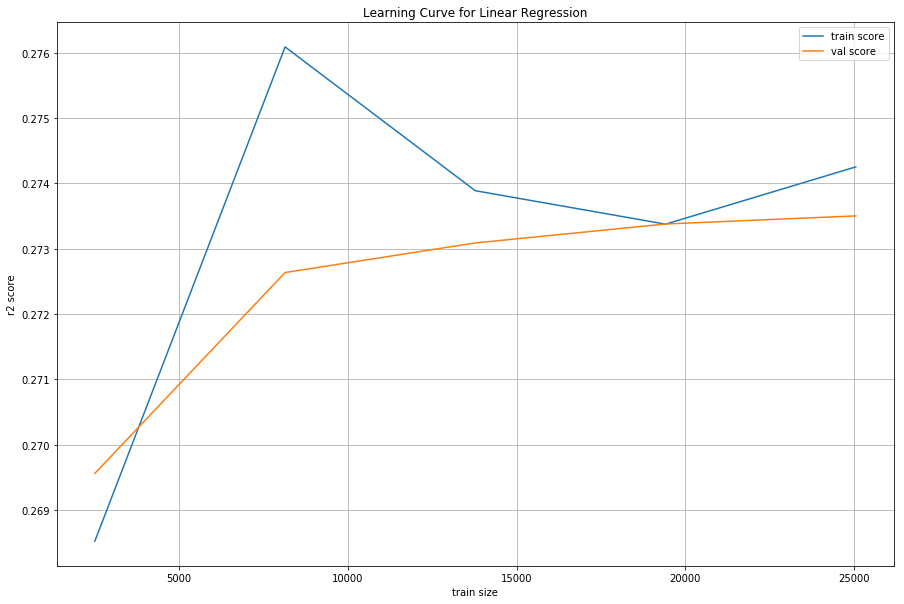

In [107]:
from sklearn.model_selection import learning_curve

lin2 = LinearRegression()

#learning_curve?
#training set size (excluding validation set), training set score, validation set score
train_sizes,train_score, val_score = learning_curve(lin2, train_X_scaled, train_y_scaled)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax= plt.subplots(figsize=(15,10))
ax.plot(train_sizes, train_mean, label='train score')
ax.plot(train_sizes, val_mean, label='val score')
ax.set(xlabel='train size', ylabel='r2 score', title='Learning Curve for Linear Regression')
ax.grid()
ax.legend()
plt.show()

In [110]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(train_X.values.reshape(-1, 1))

train_X_poly = poly.transform(train_X.values.reshape(-1, 1))
test_X_poly = poly.transform(test_X.values.reshape(-1, 1))

# Scale the features back to SGD happy ranges ([-1, 1])
x_scaler_poly = StandardScaler()
x_scaler_poly.fit(train_X_poly)
train_X_poly_scaled = x_scaler_poly.transform(train_X_poly)
test_X_poly_scaled = x_scaler_poly.transform(test_X_poly)

# fit a Linear Regression Model (or SGDRegressor or DecisionTreeRegressor, ...)
lin = LinearRegression()
lin.fit(train_X_poly_scaled, train_y_scaled)

#predict
pred = lin.predict(test_X_poly_scaled)